In [71]:
import os
import pandas as pd
from math import ceil
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
#pd.show_versions(as_json=False)

In [72]:
# Load Data
datapath = '../csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
    
raw = pd.read_csv(datapath)
del raw['Lat']
del raw['Long']
raw= raw.replace('Mainland China','China')
raw

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,0,0,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,NaN,Timor-Leste,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
237,NaN,Belize,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
238,Recovered,Canada,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239,NaN,Laos,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [73]:
df=raw.groupby('Country/Region').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]

df = df[(df.index.isin(['Canada','Japan'])) | (df[last_date]>8000)]

df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
#del df['Cruise Ship']
df

,Canada,China,France,Germany,Iran,Italy,Japan,"Korea, South",Spain,Switzerland,US,United Kingdom
date,,,,,,,,,,,,
2020-01-22,0,548,0,0,0,0,2,1,0,0,1,0
2020-01-23,0,643,0,0,0,0,2,1,0,0,1,0
2020-01-24,0,920,2,0,0,0,2,2,0,0,2,0
2020-01-25,0,1406,3,0,0,0,2,2,0,0,2,0
2020-01-26,1,2075,3,0,0,0,4,3,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-20,943,81250,12758,19848,19644,47021,963,8652,20410,5294,19100,4014
2020-03-21,1277,81305,14463,22213,20610,53578,1007,8799,25374,6575,25489,5067
2020-03-22,1469,81435,16243,24873,21638,59138,1101,8961,28768,7474,33276,5745


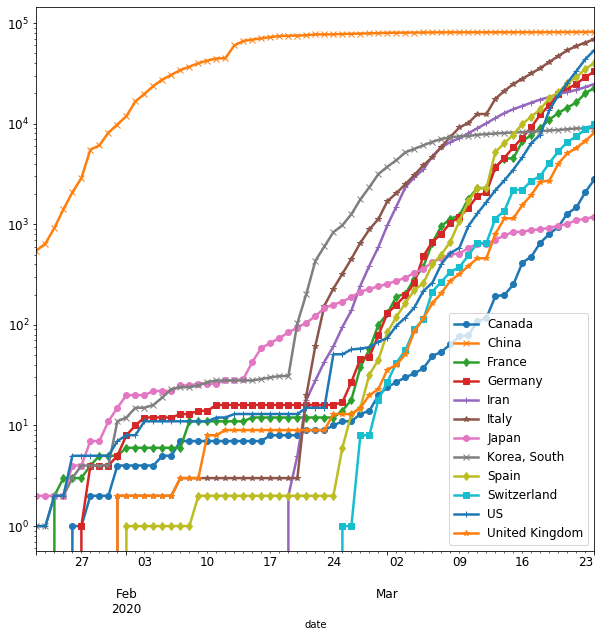

In [74]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]
def plotdataframe(df, logy=False, legend=True):
    fig, ax = plt.subplots()
    markers = [item for sublist in ['oxds+*']*ceil(len(df.columns)/5) for item in sublist]    
    for c,m in zip(df,markers):
        df[c].plot(logy=logy, marker=m, fontsize=12,ax=ax, linewidth=2.5)
    
    font = font_manager.FontProperties(family='sans-serif',
                                   weight='normal',
                                   style='normal', size=12)
    legend and ax.legend(prop=font)

    return ax

plotdataframe(df, logy=True)

In [75]:
# Shift all the series
maxDate = max(df.index)
threshold = 200
for c in df.columns:
    for i,a in enumerate(df[c]):        
        if i==0 and a>threshold:
            df[c]=df[c].shift(4) # hack to push out china
            break
        if a>=threshold:
            df[c]=df[c].shift(-i)            
            break
df=df.reset_index(drop=True)
del df['China']
df

,Canada,France,Germany,Iran,Italy,Japan,"Korea, South",Spain,Switzerland,US,United Kingdom
0,252.0,204.0,262.0,245.0,229.0,214.0,204.0,222.0,214.0,217.0,207.0
1,415.0,288.0,482.0,388.0,322.0,228.0,433.0,259.0,268.0,262.0,274.0
2,478.0,380.0,670.0,593.0,453.0,241.0,602.0,400.0,337.0,402.0,322.0
3,657.0,656.0,799.0,978.0,655.0,256.0,833.0,500.0,374.0,518.0,384.0
4,800.0,959.0,1040.0,1501.0,888.0,274.0,977.0,673.0,491.0,583.0,459.0
...,...,...,...,...,...,...,...,...,...,...,...
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


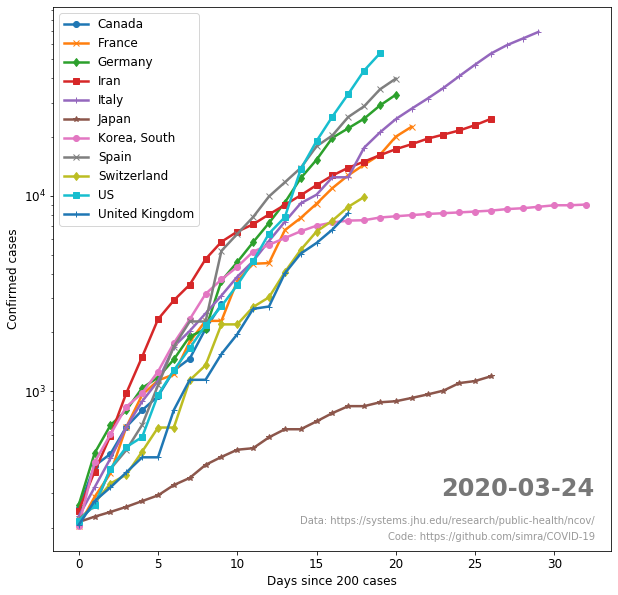

In [76]:
ax=plotdataframe(df, logy=True)
ax.set_xlabel('Days since {} cases'.format(threshold), size=12)
ax.set_ylabel('Confirmed cases', size=12)
ax.text(0.97, 0.1, maxDate.strftime('%Y-%m-%d'), transform=ax.transAxes, color='#777777', size=24, ha='right', weight=800)
ax.text(0.97, 0.05, 'Data: https://systems.jhu.edu/research/public-health/ncov/', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
ax.text(0.97, 0.02, 'Code: https://github.com/simra/COVID-19', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))

savedir = os.path.join('data',maxDate.strftime('%Y%m%d'))
if not os.path.isdir(savedir):
    os.makedirs(savedir)
plt.savefig(os.path.join(savedir,'1_countryshift.png'))

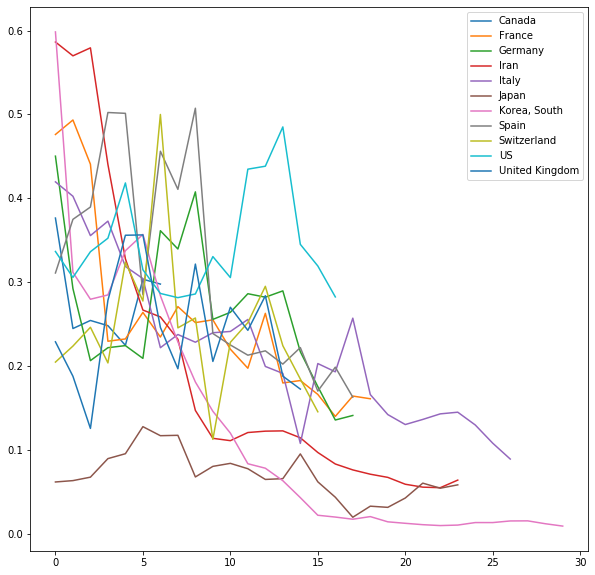

In [77]:
from math import pow
growth = {}

gdf = df
for c in gdf.columns:
    growth[c]=[]
    for i in range(3,len(gdf[c])):        
        if not np.isnan(gdf[c][i] and gdf[c][i]>2000):                          
            growth[c].append(pow(gdf[c][i]/gdf[c][i-3],1.0/3)-1.0)
            
fig,ax = plt.subplots()
for c in growth:
    ax.plot(growth[c])
ax.legend(growth.keys())

In [78]:
# US and Canada 
df=raw
# temporarily drop 03/14
#del df[df.columns[-1]]
df = df[df['Country/Region'].isin(['Canada','US','Italy'])]

df=df.groupby('Country/Region').sum()


df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)


df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
df

,Canada,Italy,US
date,,,
2020-01-22,0,0,1
2020-01-23,0,0,1
2020-01-24,0,0,2
2020-01-25,0,0,2
2020-01-26,1,0,5
...,...,...,...
2020-03-20,943,47021,19100
2020-03-21,1277,53578,25489
2020-03-22,1469,59138,33276


In [79]:
#https://stackoverflow.com/questions/54376900/fit-sigmoid-curve-in-python

from scipy.optimize import curve_fit
import numpy as np
from scipy.optimize import differential_evolution
import warnings

yData = df['US']
xData = range(len(yData))

def sigmoid(x, amplitude, x0, k):
    return amplitude**2/(1.0+np.exp(-(x-k)/x0))


# function for genetic algorithm to minimize (sum of squared error)
def sumOfSquaredError(parameterTuple):
    warnings.filterwarnings("ignore") # do not print warnings by genetic algorithm
    val = sigmoid(xData, *parameterTuple)
    return np.sum((yData - val) ** 2.0)


def generate_Initial_Parameters():
    # min and max used for bounds
    maxX = max(xData)
    minX = min(xData)
    maxY = max(yData)
    minY = min(yData)

    parameterBounds = []
    parameterBounds.append([minY**2, maxY**2]) # search bounds for amplitude
    parameterBounds.append([1.0/maxX, 1e6]) # search bounds for x0
    parameterBounds.append([minX, maxX]) # search bounds for k

    # "seed" the numpy random number generator for repeatable results
    result = differential_evolution(sumOfSquaredError, parameterBounds, seed=3)
    return result.x, np.array(parameterBounds).T

# by default, differential_evolution completes by calling curve_fit() using parameter bounds
geneticParameters, bounds = generate_Initial_Parameters()
print(geneticParameters)
# now call curve_fit without passing bounds from the genetic algorithm,
# just in case the best fit parameters are aoutside those bounds
popt, pcov = curve_fit(sigmoid, xData, yData, geneticParameters, bounds=[[0,0,0],[np.inf,np.inf,np.inf]],maxfev=10000)
sigma = np.sqrt(np.diag(pcov)) 
print('Fitted parameters: {} Cov: {} Sigma: {}'.format(popt, pcov,sigma))
print()

modelPredictions = sigmoid(xData, *popt) 

absError = modelPredictions - yData

SE = np.square(absError) # squared errors
MSE = np.mean(SE) # mean squared errors
RMSE = np.sqrt(MSE) # Root Mean Squared Error, RMSE
Rsquared = 1.0 - (np.var(absError) / np.var(yData))

print()
print('RMSE:', RMSE)
print('R-squared:', Rsquared)

xModel = np.linspace(min(xData), min(xData)+90)



[  84.31499956 8892.60563526   49.10675788]
Fitted parameters: [339.33212888   2.6288108   62.32775838] Cov: [[8.82172574e+01 4.76538254e-01 2.48207502e+00]
 [4.76538254e-01 3.00459398e-03 1.37725548e-02]
 [2.48207502e+00 1.37725548e-02 7.03642994e-02]] Sigma: [9.39240424 0.05481418 0.2652627 ]


RMSE: 303.82797206087315
R-squared: 0.9991403252967465


In [80]:
# estimate the uncertainty range of the parameters.
L=np.linalg.cholesky(pcov).T
print(popt)
print(L)
eps = 1
[popt-L.dot([eps,0,0]),
 popt+L.dot([eps,0,0]),
 popt-L.dot([0,eps,0]),
 popt+L.dot([0,eps,0]),
 popt-L.dot([0,0,eps]),
 popt+L.dot([0,0,eps])]

# note we use epsilon = 0.5 instead of 1 stanard deviation. 
# The true distribution is asymmetric and heavy-tailed, so we end up with bad estimates for the amplitude.

[339.33212888   2.6288108   62.32775838]
[[9.39240424 0.05073656 0.26426408]
 [0.         0.02074598 0.01757957]
 [0.         0.         0.01482419]]


[array([329.93972464,   2.6288108 ,  62.32775838]),
 array([348.72453312,   2.6288108 ,  62.32775838]),
 array([339.28139233,   2.60806481,  62.32775838]),
 array([339.38286544,   2.64955678,  62.32775838]),
 array([339.06786481,   2.61123123,  62.31293418]),
 array([339.59639296,   2.64639036,  62.34258257])]

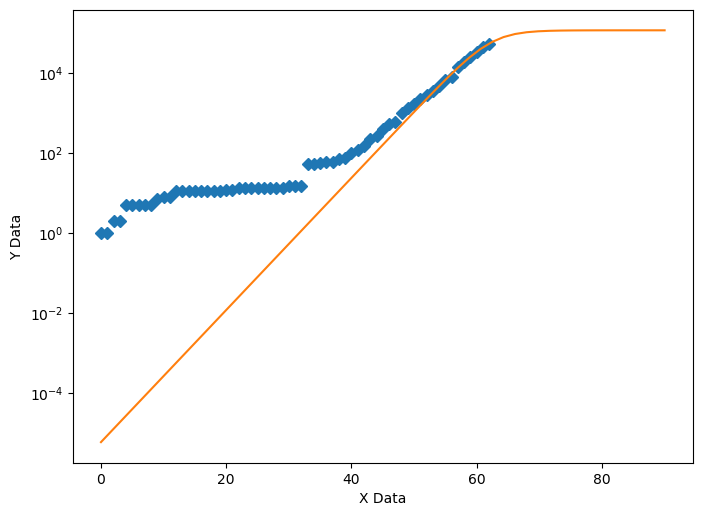

In [81]:
def ModelAndScatterPlot(graphWidth, graphHeight):
    f = plt.figure(figsize=(graphWidth/100.0, graphHeight/100.0), dpi=100)
    axes = f.add_subplot(111)

    # first the raw data as a scatter plot
    axes.plot(xData, yData,  'D')

    # create data for the fitted equation plot    
    yModel = sigmoid(xModel, *popt)

    # now the model as a line plot
    axes.plot(xModel, yModel)
    axes.set_yscale('log')
    axes.set_xlabel('X Data') # X axis data label
    axes.set_ylabel('Y Data') # Y axis data label

    plt.show()
    plt.close('all') # clean up after using pyplot

graphWidth = 800
graphHeight = 600
ModelAndScatterPlot(graphWidth, graphHeight)

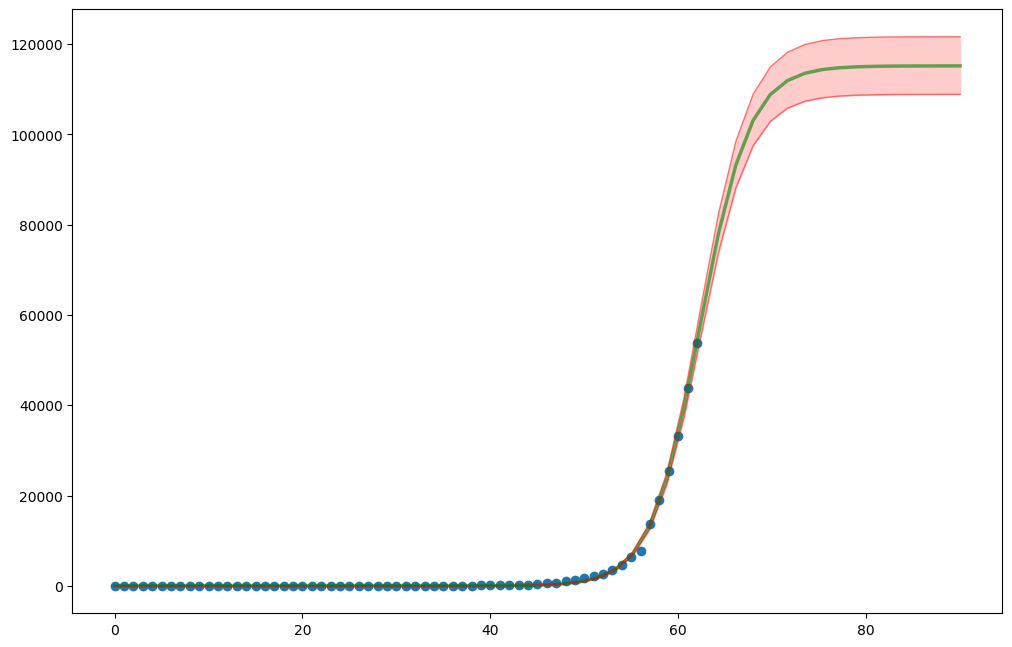

In [83]:
# Plot the best fit sigmoid and uncertainty region.

fig = plt.figure(figsize=(12,8), dpi=100, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.xaxis.labelpad = 20
ax.yaxis.labelpad = 20
curveFit = sigmoid(xData,*popt)
curveFitModel = sigmoid(xModel,*popt)
plt.plot(xData, yData, 'o')
#plt.hold(True)
plt.plot(xModel, curveFitModel, 
    linewidth=2.5, 
    color = 'green',
    alpha = 0.6) #,
    #label = fitEquation)

maxes = None
mins = None

for p in [ [0,eps,0], [eps,0,0], [0,0,eps]]:
    params = popt+L.dot(p)
    s= sigmoid(xModel,*params)
    #plt.plot(xModel, s, linewidth= 1.0, alpha = 0.5, color='red')
    if maxes is None:
        maxes = s
    if mins is None:
        mins =s
    maxes = np.maximum(maxes,s)
    mins = np.minimum(mins,s)
    #print(maxes,mins)
    params = popt-L.dot(p)
    #params[0] = max(params[0],max(yData))   # fudge in case the amplitude is negative. 
    s= sigmoid(xModel,*params)
    #plt.plot(xModel, s, linewidth= 1.0, alpha = 0.5, color='red')
    maxes = np.maximum(maxes,s)
    mins = np.minimum(mins,s)

plt.plot(xModel, maxes, linewidth= 1.0, alpha = 0.5, color='red')
plt.plot(xModel, mins, linewidth= 1.0, alpha = 0.5, color='red')
    
plt.fill_between(xModel, mins, maxes, color='#FFcccc')
#ax.set_yscale('log')
#plt.plot(xModel, sigmoid(xModel,lower[0], lower[1], lower[2] ), #curveFitModel-fitError, 
#    linewidth = 1.0, 
#    alpha = 0.5, 
#    color = 'red')
#props = dict(boxstyle='round', facecolor='wheat', alpha=0.2)
#plt.text(3.2, 1.0, 
#    ("$\mathrm{curve fit\;\;values:\;}$\n a = %.3f\t $\pm$ %.3f\n b = %.3f\t $\pm$ %.3f \n c = %.3f\t $\pm$ %.3f" 
#    % (popt[0], sigma[0], popt[1], sigma[1], popt[2], sigma[2])), fontsize=16,bbox=props )
#xlabel(r'\textrm{time (s)}', fontsize=24)
#ylabel(r'\textrm{temperature (K)}',fontsize=24)
#plt.title(r"Exponential fit with $\pm 1\sigma$ and $\pm 3\sigma$ fit errors",
#      fontsize=28, color='k')
#ax.legend(fontsize=18)
#plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))
#plt.savefig('3sigmaPlot.pdf', figsize=(6,4), dpi=600)
#plt.show()

[[19, 20, 20, 20, 20, 21, 21, 22, 21, 21], [11, 11, 11, 11, 12, 11, 11, 12, 11, 11, 11, 11, 11, 10, 10, 10, 9, 8, 7, 7, 7, 6, 6, 5, 5, 4, 4, 3]]


Text(0, 0.5, 'Country reached X cases Y days after Italy')

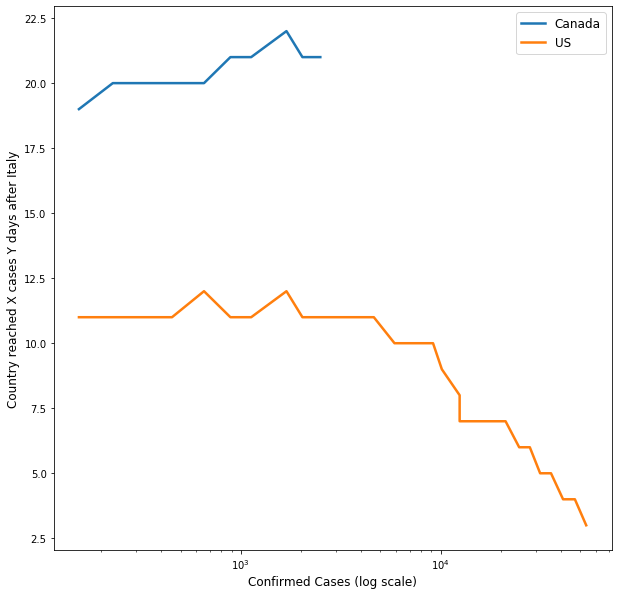

In [84]:
deltas = [[],[]]
vals = []
for i,v in enumerate(df['Italy']):
    if v<100:
        continue
    vals.append(v)
    for j,v2 in enumerate(df['Canada']):            
        if v2>=v:
            deltas[0].append(j-i)
            break
    for j,v2 in enumerate(df['US']):
        if v2>=v:
            deltas[1].append(j-i)
            break
print(deltas)
fig, ax = plt.subplots()
#ax.plot(zip(vals,deltas[0]))

ax.plot(vals[:len(deltas[0])],deltas[0], linewidth=2.5)
ax.plot(vals[:len(deltas[1])],deltas[1], linewidth=2.5)
font = font_manager.FontProperties(family='sans-serif',
                                   weight='normal',
                                   style='normal', size=12)
ax.legend(['Canada','US'], prop=font)
ax.set_xscale('log')
ax.set_xlabel('Confirmed Cases (log scale)', size=12)
ax.set_ylabel('Country reached X cases Y days after Italy', size=12)

Text(0, 0.5, 'Confirmed cases')

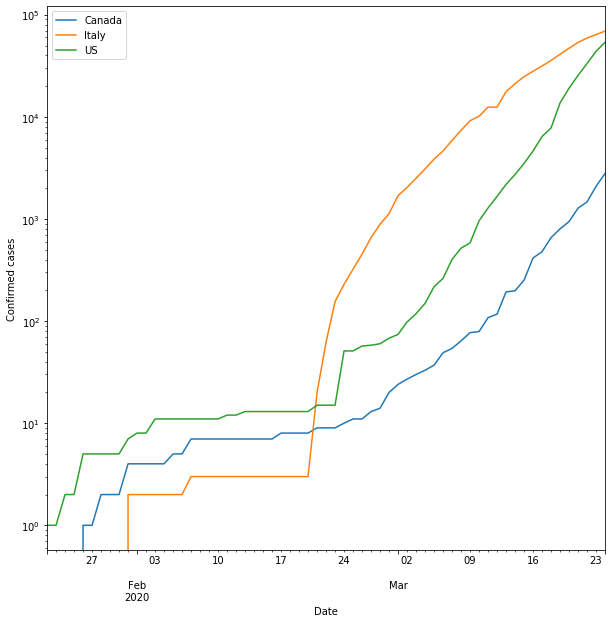

In [85]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 10]

ax=df.plot(legend=True,logy=True) #list(df.columns))
ax.set_xlabel('Date')
ax.set_ylabel('Confirmed cases')


In [86]:
df=raw.groupby('Country/Region').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]

df = df[(df.index.isin(['Mexico']))]

df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
df

,Mexico
date,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-03-20,164
2020-03-21,203
2020-03-22,251


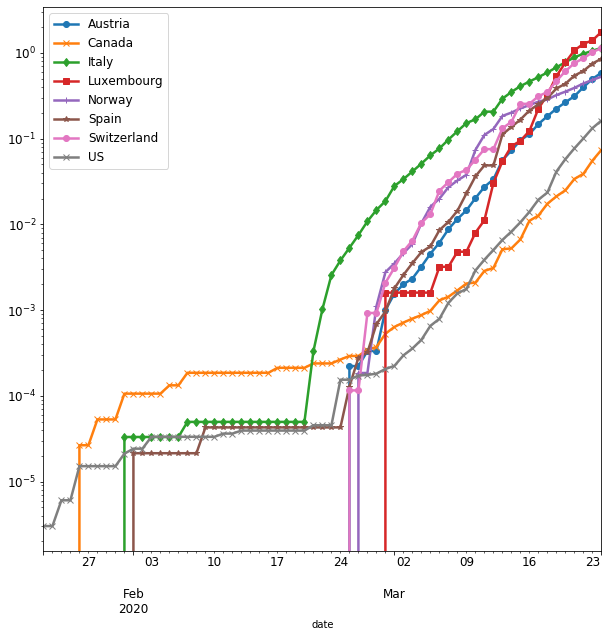

In [94]:
# Try normalizing by population
# https://population.un.org/wpp/Download/Files/1_Indicators%20(Standard)/CSV_FILES/WPP2019_TotalPopulationBySex.csv
wpp = pd.read_csv('../wpp/WPP2019_TotalPopulationBySex.csv')
wpp=wpp[(wpp['Time']==2020) & (wpp['Variant']=='Medium')]
wpp = dict(zip(wpp['Location'],wpp['PopTotal']))
wpp['Iran']=wpp['Iran (Islamic Republic of)']
wpp['US']=wpp['United States of America']
wpp['Korea, South']= wpp['Republic of Korea']

df=raw.groupby('Country/Region').sum()
last_date = list(df.columns)[-1]

df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
    #del df['Cruise Ship']

    
df = df[[c for c in df.columns if df[c].max()>1000 or c in ['Canada','US']]]
for c in df.columns:
    df[c] = df[c]/wpp[c]
df = df[[c for c in df.columns if df[c].max()>0.5 or c in ['Canada','US']]]

plotdataframe(df, logy=True)

#wpp

In [95]:
maxDate = max(df.index)
threshold = 1e-3
for c in df.columns:
    for i,a in enumerate(df[c]):        
        if i==0 and a>threshold:
            df[c]=df[c].shift(4) # hack to push out china
            break
        if a>=threshold:
            df[c]=df[c].shift(-i)            
            break
df=df.reset_index(drop=True)

df

,Austria,Canada,Italy,Luxembourg,Norway,Spain,Switzerland,US
0,0.001554,0.001298,0.001025,0.001598,0.001107,0.001797,0.002080,0.001214
1,0.001999,0.001431,0.002564,0.001598,0.002767,0.002567,0.003120,0.001565
2,0.002332,0.001696,0.003788,0.001598,0.003505,0.003529,0.004853,0.001761
3,0.003220,0.002040,0.005326,0.001598,0.004611,0.004748,0.006471,0.002897
4,0.004552,0.002093,0.007492,0.001598,0.005903,0.005540,0.010399,0.003870
...,...,...,...,...,...,...,...,...
58,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


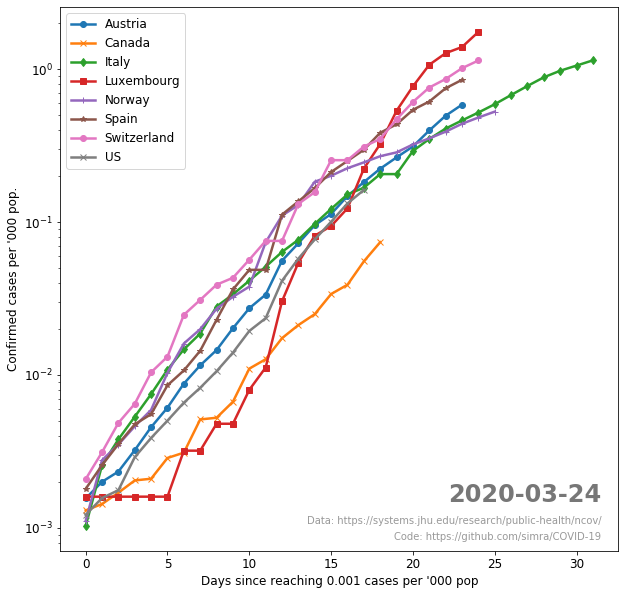

In [96]:
ax=plotdataframe(df, logy=True)
ax.set_xlabel("Days since reaching {} cases per '000 pop".format(threshold), size=12)
ax.set_ylabel("Confirmed cases per '000 pop." , size=12)
ax.text(0.97, 0.09, maxDate.strftime('%Y-%m-%d'), transform=ax.transAxes, color='#777777', size=24, ha='right', weight=800)
ax.text(0.97, 0.05, 'Data: https://systems.jhu.edu/research/public-health/ncov/', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
ax.text(0.97, 0.02, 'Code: https://github.com/simra/COVID-19', transform=ax.transAxes, ha='right', size=10,
        color='#999999', bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
plt.savefig(os.path.join(savedir,'2_countryshift_norm.png'))

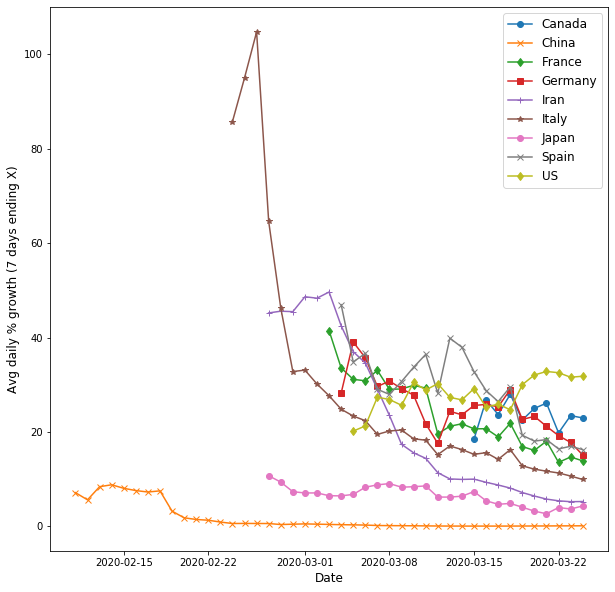

In [98]:
df=raw.groupby('Country/Region').sum()
# 03/14: temporarily drop the last column
#del df[df.columns[-1]]
last_date = list(df.columns)[-1]

df = df[(df.index.isin(['Canada','Japan'])) | (df[last_date]>10000)]

df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)

df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]
#del df['Cruise Ship']

fig, ax = plt.subplots()
growth = {}
markers = [item for sublist in ['oxds+*']*ceil(len(df.columns)/5) for item in sublist]    
for c,m in zip(df.columns,markers):
    growth[c] = [(pow(df[c][i]/max(1.0,df[c][i-6]),1.0/7)-1)*100 if df[c][i]>200 else float('nan') for i in range(20,len(df[c]))]
    #growth[c] = [growth[c][i] if growth[c][i]<100 else float('nan') for i in range(len(growth[c]))]
    ax.plot(df.index[20:], growth[c], marker=m)

ax.legend(df.columns, prop=font)       
ax.set_xlabel('Date', size=12)
ax.set_ylabel('Avg daily % growth (7 days ending X)', size=12)
#plt.ylim((0,100))
plt.savefig(os.path.join(savedir,'3_growth.png'))

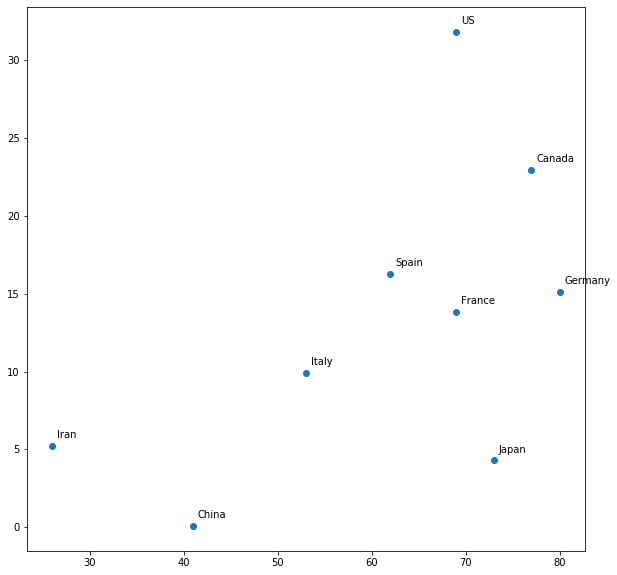

In [99]:
cpi = pd.read_csv('../cpi/cpi.tsv',sep='\t')
cpi = dict(zip(cpi['Country'],cpi['CPI score 2019']))
cpi
check = [c for c in growth if c not in cpi]
cpi['US'] = cpi['United States of America']

x= [cpi[c] for c in growth]
y = [growth[c][-1] for c in growth]
fig, ax = plt.subplots()
ax.scatter(x, y)
for i, txt in enumerate(growth):
    ax.annotate(txt, (x[i]+0.5,y[i]+0.5))

In [100]:
df=raw
# temporarily drop 03/14
#del df[df.columns[-1]]
#df = df[df['Country/Region'].isin(['Canada','US','Italy'])]

df=df.groupby('Country/Region').sum()


df['Country/Region']=df.index
df=df.melt(id_vars='Country/Region',var_name='date', value_name='Confirmed').pivot(index='date',columns='Country/Region')
df['date']=pd.to_datetime(df.index)


df.index.name = None
df=df.sort_values(by=['date'])
df.set_index('date', inplace=True)
df.columns = [c[1] for c in df.columns]

matrix = {}

for c in sorted(df.columns, key=lambda c: df[c][-1], reverse=True):
    if max(df[c])<1000:
        continue
    matrix[c]={}
    last1 = df[c][-1]
    for c2 in sorted(df.columns, key=lambda c: df[c][-1], reverse=True):
        if max(df[c2])<1000:
            continue
        if c2==c:
            matrix[c][c2]=0
            continue
        last2 = df[c2][-1]
        if last2<=last1:
            for j,v2 in enumerate(df[c]):            
                if v2>=last2:
                    matrix[c][c2]=len(df[c])-j-1
                    break
        else:
            for j,v2 in enumerate(df[c2]):            
                if v2>=last1:
                    matrix[c][c2]=-(len(df[c2])-j-1)
                    break
result=pd.DataFrame.from_dict(matrix)
result.to_csv('lagtimes.tsv', sep='\t')